# Bank note classification using different algorithms

### 1.Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Loading the data set:

In [2]:
old = pd.read_csv("data_banknote_authentication.txt")

In [3]:
old.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### 3.Explaratory Data Analysis

In [4]:
# We can see that th data set is not in a regular format. So edit it and make it more meaningful:

In [5]:
old.columns = ["variance", "skewness", "kurtosis", "entropy", "class"]

In [6]:
old.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [7]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   kurtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
old.describe()

,variance,skewness,kurtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
old.corr()

,variance,skewness,kurtosis,entropy,class
variance,1.000000,0.263333,-0.380358,0.276666,-0.724655
skewness,0.263333,1.000000,-0.786729,-0.526896,-0.444281
kurtosis,-0.380358,-0.786729,1.000000,0.319219,0.155346
entropy,0.276666,-0.526896,0.319219,1.000000,-0.023200
class,-0.724655,-0.444281,0.155346,-0.023200,1.000000


In [10]:
old.drop_duplicates(inplace=True)

In [11]:
old.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [12]:
# We can see that ther are no missing values. All features are of numerical values, so no need for data conversions.

In [13]:
old["class"].value_counts()

0    737
1    610
Name: class, dtype: int64

In [14]:
# We can see that there are 737 forged notes and 610 original ones

### 4.Distribution plots for the features :

<AxesSubplot:xlabel='entropy', ylabel='Density'>

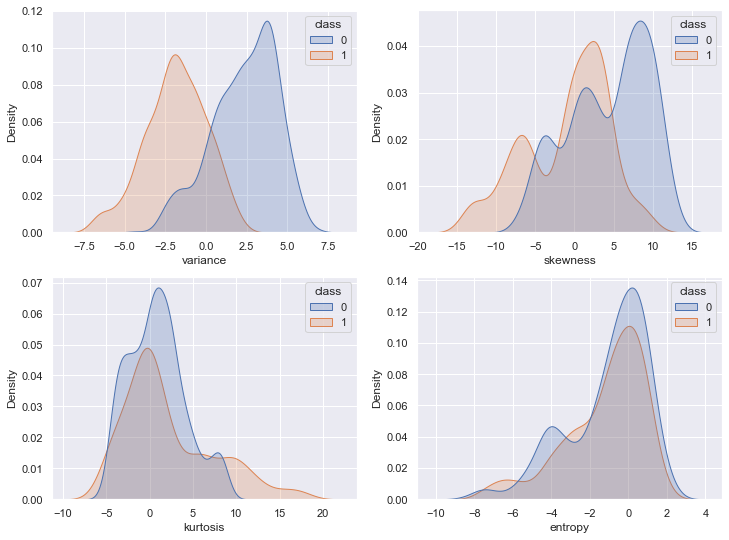

In [15]:
sns.set(rc= {"figure.figsize":(12,9)})
plt.subplot(221)
sns.kdeplot(x = "variance", data = old, hue = "class", shade = True)
plt.subplot(222)
sns.kdeplot(x = "skewness", data = old, hue = "class", shade = True)
plt.subplot(223)
sns.kdeplot(x = "kurtosis", data = old, hue = "class", shade = True)
plt.subplot(224)
sns.kdeplot(x ="entropy" , data = old, hue = "class", shade = True)

In [16]:
# We can see that the variance and skewness of both the notes are much different.

<AxesSubplot:xlabel='variance', ylabel='skewness'>

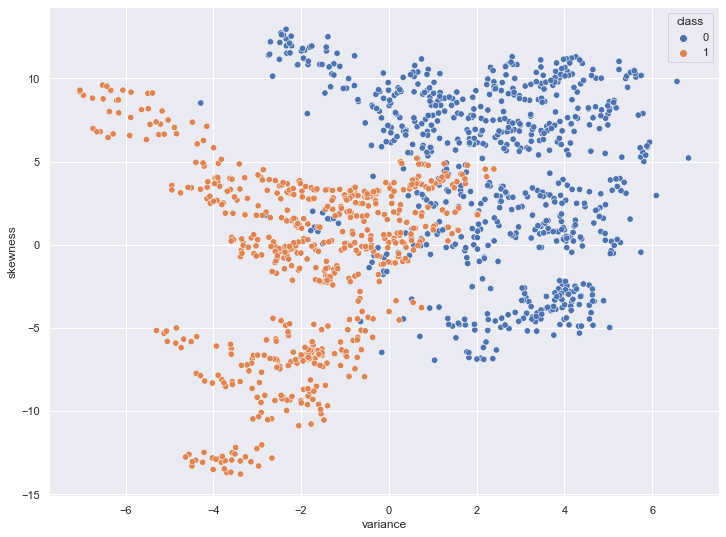

In [17]:
sns.scatterplot(data =old, x = "variance", y = "skewness", hue="class", s = 40)

In [18]:
# class is our target and rest is our features.

In [19]:
x = old.loc[:, ["variance", "skewness", "kurtosis", "entropy"]]

In [20]:
y = old["class"].values

In [21]:
x.shape

(1347, 4)

In [22]:
y.shape

(1347,)

## 5.Model building 

### Splitting the data set into training and testing sets:

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Model building using random forest classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_RFC = rfc.predict(x_test)

In [29]:
r2_score(y_test, y_pred_RFC)

0.9880927142958095

In [30]:
confusion_matrix(y_test, y_pred_RFC)

array([[177,   1],
       [  0, 159]], dtype=int64)

### Model building using Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()

In [33]:
LR.fit(x_train, y_train)

LogisticRegression()

In [34]:
y_pred_LR = LR.predict(x_test)

In [35]:
r2_score(y_test, y_pred_LR)

0.9761854285916189

In [36]:
confusion_matrix(y_test, y_pred_LR)

array([[176,   2],
       [  0, 159]], dtype=int64)

### Model building using Support Vector machine

In [37]:
from sklearn import svm

In [38]:
svc = svm.SVC()

In [39]:
svc.fit(x_train, y_train)

SVC()

In [40]:
y_pred_svc = svc.predict(x_test)

In [41]:
r2_score(y_test, y_pred_svc)

1.0

In [42]:
confusion_matrix(y_test, y_pred_svc)

array([[178,   0],
       [  0, 159]], dtype=int64)

### Model building using KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [45]:
y_pred_KNN = KNN.predict(x_test)

In [46]:
r2_score(y_test,y_pred_KNN)

1.0

In [47]:
confusion_matrix(y_test, y_pred_KNN)

array([[178,   0],
       [  0, 159]], dtype=int64)